In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
# Define parameters
stock_symbols = ['BRK-B', 'WFC', 'OKE', 'NUE', 'HII','MSTR','XOM','TSLA','GEO','XLV','XLK','XLI','XLF','XLE']
benchmark_symbol = '^GSPC'  # S&P 500 index
start_date = '1999-01-01'
end_date = '2024-12-31'
simulation_runs = 1000
time_horizon = 252  # 1 year of trading days

In [ ]:
# Fetch historical data using Yahoo Finance API
all_symbols = stock_symbols + [benchmark_symbol]
stock_data = yf.download(all_symbols, start=start_date, end=end_date)
print("Stock data retrieved:")
print(stock_data.head())  # Debugging output

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  15 of 15 completed

Stock data retrieved:
Price           Close                                                   \
Ticker          BRK-B       GEO HII      MSTR       NUE       OKE TSLA   
Date                                                                     
1999-01-04  46.599998  2.519624 NaN  15.09375  5.647215  2.298682  NaN   
1999-01-05  45.540001  2.418615 NaN  15.68750  5.727093  2.314842  NaN   
1999-01-06  45.139999  2.407391 NaN  15.68750  5.878856  2.314842  NaN   
1999-01-07  44.080002  2.413003 NaN  15.56250  5.958732  2.290601  NaN   
1999-01-08  43.500000  2.379333 NaN  17.25000  6.366097  2.282522  NaN   

Price                                       ...  Volume                 \
Ticker           WFC        XLE        XLF  ...     OKE TSLA       WFC   
Date                                        ...                          
1999-01-04  9.806401  11.966022  11.438013  ...  423528  NaN  11181200   
1999-01-05  9.883250  11.901900  11.544771  ...  258594  NaN   7928800   
1999-01-06  9.7

In [ ]:
# Generate synthetic historical stock return data
np.random.seed(42)
dates = pd.date_range(start="1999-01-01", end="2024-12-31", freq="B")  # Business days
num_stocks = len(stock_symbols)

# Simulated daily log returns for each stock
historical_stock_returns = np.random.normal(loc=0.0005, scale=0.01, size=(len(dates), num_stocks))

# Convert to a DataFrame with stock symbols as columns
historical_stock_returns_df = pd.DataFrame(historical_stock_returns, index=dates, columns=stock_symbols)

# Compute cumulative returns for each stock
historical_cumulative_returns_stocks = (1 + historical_stock_returns_df).cumprod()

# Define moving average windows
short_window = 50  # 50-day moving average
long_window = 200  # 200-day moving average

# Calculate moving averages for each stock
short_moving_avg_stocks = historical_cumulative_returns_stocks.rolling(window=short_window).mean()
long_moving_avg_stocks = historical_cumulative_returns_stocks.rolling(window=long_window).mean()

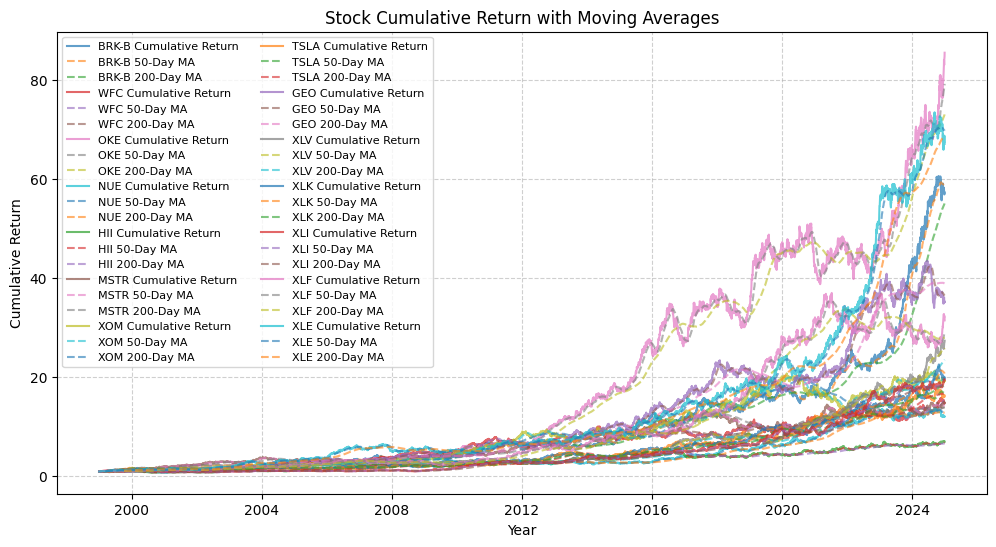

In [ ]:
# Plot cumulative returns and moving averages for each stock
fig, ax = plt.subplots(figsize=(12, 6))

for stock in stock_symbols:
    ax.plot(historical_cumulative_returns_stocks[stock], label=f"{stock} Cumulative Return", alpha=0.7)
    ax.plot(short_moving_avg_stocks[stock], linestyle="--", alpha=0.6, label=f"{stock} {short_window}-Day MA")
    ax.plot(long_moving_avg_stocks[stock], linestyle="--", alpha=0.6, label=f"{stock} {long_window}-Day MA")

# Labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Return")
ax.set_title("Stock Cumulative Return with Moving Averages")
ax.legend(loc="upper left", ncol=2, fontsize=8)
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [ ]:
# Compute key statistics for each stock
stock_stats_df = pd.DataFrame(index=stock_symbols)

# Calculate annualized return and volatility
annualized_return = historical_stock_returns_df.mean() * 252 * 100  # Convert to percentage
annualized_volatility = historical_stock_returns_df.std() * np.sqrt(252) * 100  # Convert to percentage

# Define risk-free rate (assume 2%)
risk_free_rate = 2

# Compute Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

# Populate the DataFrame with statistics
stock_stats_df["Annualized Return (%)"] = annualized_return
stock_stats_df["Annualized Volatility (%)"] = annualized_volatility
stock_stats_df["Sharpe Ratio"] = sharpe_ratio

# Print the statistics table
print(stock_stats_df)

       Annualized Return (%)  Annualized Volatility (%)  Sharpe Ratio
BRK-B              16.298256                  15.865018      0.901244
WFC                11.286880                  15.843955      0.586147
OKE                17.806515                  15.992326      0.988381
NUE                10.461676                  15.603927      0.542279
HII                 8.476994                  15.849207      0.408664
MSTR               11.242001                  15.765118      0.586231
XOM                12.275012                  16.111410      0.637748
TSLA               11.611885                  15.808640      0.608015
GEO                14.503373                  15.924253      0.785178
XLV                13.548904                  15.844056      0.728911
XLK                12.355210                  16.015518      0.646574
XLI                12.286231                  15.868713      0.648208
XLF                14.106047                  16.068994      0.753379
XLE                1

In [ ]:
# Ensure data includes 'Adj Close' or fallback to 'Close'
if 'Adj Close' in stock_data:
    stock_data = stock_data['Adj Close']
else:
    stock_data = stock_data['Close']

In [ ]:
# Check available columns
available_stocks = list(stock_data.columns)
valid_stocks = [stock for stock in stock_symbols if stock in available_stocks]
print("Valid stocks:", valid_stocks)  # Debugging output

Valid stocks: ['BRK-B', 'WFC', 'OKE', 'NUE', 'HII', 'MSTR', 'XOM', 'TSLA', 'GEO', 'XLV', 'XLK', 'XLI', 'XLF', 'XLE']


In [ ]:
# Filter stock data to valid stocks
stock_data = stock_data[valid_stocks + [benchmark_symbol]].dropna()
print("Stock data after NaN removal:")
print(stock_data.head())

Stock data after NaN removal:
Ticker          BRK-B        WFC        OKE        NUE        HII    MSTR  \
Date                                                                        
2011-03-22  84.980003  21.317617  13.553184  31.270058  30.427887  11.977   
2011-03-23  84.739998  21.277033  13.563444  31.516378  30.233101  11.953   
2011-03-24  85.160004  21.385515  13.442328  31.728500  30.233101  12.098   
2011-03-25  85.239998  21.656738  13.561391  31.858503  31.856354  12.105   
2011-03-28  84.370003  21.432981  13.491590  31.639557  30.638897  12.283   

Ticker            XOM      TSLA       GEO        XLV        XLK        XLI  \
Date                                                                         
2011-03-22  47.980324  1.479333  6.375716  25.567842  20.888113  28.025229   
2011-03-23  48.003555  1.480667  6.402650  25.551979  21.003780  28.117441   
2011-03-24  48.079113  1.488667  6.451135  25.853518  21.334290  28.409447   
2011-03-25  48.596359  1.516667  6.56965

In [ ]:
# Calculate log returns
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()
mean_returns = log_returns.mean()
std_dev = log_returns.std()

In [ ]:
# Define portfolio weights (equal weighting for now)
num_stocks = len(valid_stocks)
weights = np.array([1/num_stocks] * num_stocks) if num_stocks > 0 else np.array([])
print("Weights:", weights)  # Debugging output

Weights: [0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857]


In [ ]:
# Ensure portfolio_cumulative is correctly calculated
if num_stocks > 0:
    print("Stock data shape:", stock_data.shape)
    print("Weights shape:", weights.shape)
    print("First row shape:", stock_data.iloc[0].shape)
    print("Initial portfolio value:", stock_data.iloc[0][valid_stocks] @ weights)

    try:
        portfolio_cumulative = (stock_data[valid_stocks] @ weights) / (stock_data.iloc[0][valid_stocks] @ weights)
        portfolio_cumulative = portfolio_cumulative.dropna()  # Drop NaN values just in case
        portfolio_cumulative.index = pd.to_datetime(portfolio_cumulative.index)  # Ensure proper datetime index
        print("Portfolio cumulative head:")
        print(portfolio_cumulative.head())
    except Exception as e:
        print("Error in portfolio calculation:", e)
        portfolio_cumulative = pd.Series(dtype=float)
else:
    print("No valid stocks in portfolio!")
    portfolio_cumulative = pd.Series(dtype=float)

Stock data shape: (3467, 15)
Weights shape: (14,)
First row shape: (15,)
Initial portfolio value: 27.313107941831863
Portfolio cumulative head:
Date
2011-03-22    1.000000
2011-03-23    1.000262
2011-03-24    1.005611
2011-03-25    1.014965
2011-03-28    1.007789
dtype: float64


In [ ]:
# Debug: Check if portfolio_cumulative is empty
if portfolio_cumulative.empty:
    print("Warning: portfolio_cumulative is empty! No portfolio data available.")

In [ ]:
# Ensure S&P 500 cumulative returns are correctly calculated
if benchmark_symbol in stock_data.columns:
    try:
        sp500_cumulative = (stock_data[benchmark_symbol] / stock_data[benchmark_symbol].iloc[0])
        sp500_cumulative = sp500_cumulative.dropna()
        sp500_cumulative.index = pd.to_datetime(sp500_cumulative.index)  # Ensure proper datetime index
        print("S&P 500 cumulative head:")
        print(sp500_cumulative.head())
    except Exception as e:
        print("Error in S&P 500 calculation:", e)
        sp500_cumulative = pd.Series(dtype=float)
else:
    print("S&P 500 data not available!")
    sp500_cumulative = pd.Series(dtype=float)

S&P 500 cumulative head:
Date
2011-03-22    1.000000
2011-03-23    1.002914
2011-03-24    1.012282
2011-03-25    1.015482
2011-03-28    1.012692
Name: ^GSPC, dtype: float64


In [ ]:
# Calculate total rate of return
portfolio_return = (portfolio_cumulative.iloc[-1] - 1) * 100 if not portfolio_cumulative.empty else None
sp500_return = (sp500_cumulative.iloc[-1] - 1) * 100 if not sp500_cumulative.empty else None

Plotting portfolio cumulative return.
Plotting S&P 500 cumulative return.


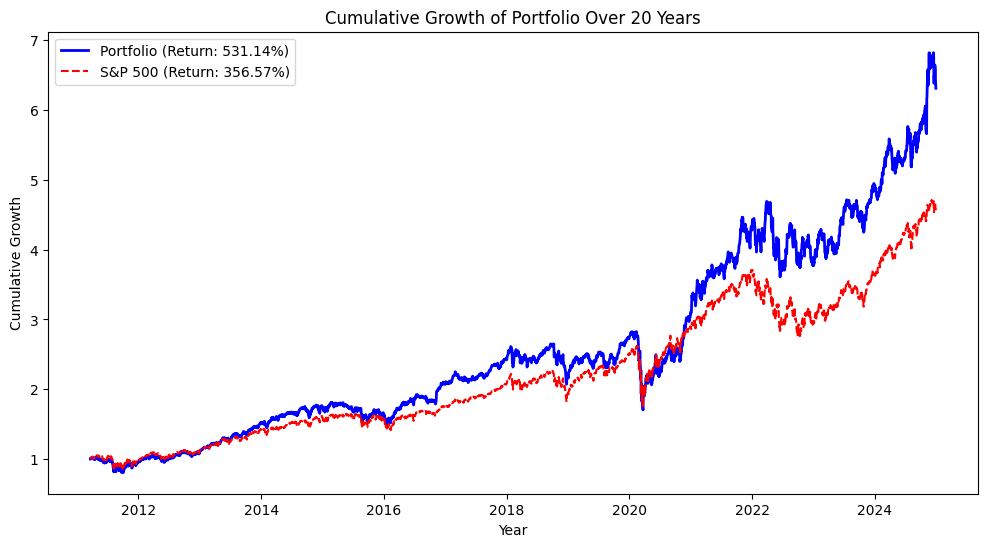

In [ ]:
# Plot cumulative returns over 20 years
plt.figure(figsize=(12, 6))
if not portfolio_cumulative.empty:
    plt.plot(portfolio_cumulative.index, portfolio_cumulative, label=f'Portfolio (Return: {portfolio_return:.2f}%)', linewidth=2, color='blue')
    print("Plotting portfolio cumulative return.")  # Debugging output
else:
    print("Error: portfolio_cumulative is empty, no plot available.")

if not sp500_cumulative.empty:
    plt.plot(sp500_cumulative.index, sp500_cumulative, label=f'S&P 500 (Return: {sp500_return:.2f}%)', linestyle='dashed', color='red')
    print("Plotting S&P 500 cumulative return.")  # Debugging output
else:
    print("Error: S&P 500 cumulative return is empty, no plot available.")

plt.title("Cumulative Growth of Portfolio Over 20 Years")
plt.xlabel("Year")
plt.ylabel("Cumulative Growth")
plt.legend()
plt.show()

Potforlio Returns Range Year 1 - 10

In [ ]:
# Calculate log returns (excluding S&P 500 for portfolio calculations)
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()
mean_returns = log_returns[valid_stocks].mean().to_numpy()  # Only use portfolio stocks
std_dev = log_returns[valid_stocks].std().to_numpy()  # Only use portfolio stocks

In [ ]:
# Define portfolio weights (equal weighting for now)
num_stocks = len(valid_stocks)
weights = np.array([1/num_stocks] * num_stocks) if num_stocks > 0 else np.array([])
print("Weights:", weights)  # Debugging output

Weights: [0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857]


In [ ]:
# Monte Carlo Simulation for portfolio returns over different years
years = [1, 3, 5, 7, 10]
percentile_5th, median, percentile_95th = [], [], []

for year in years:
    days = year * 252
    simulated_returns = []

    for _ in range(simulation_runs):
        daily_drift = (mean_returns - 0.5 * std_dev ** 2) / 252  # Scale drift per day
        daily_shock = std_dev / np.sqrt(252)  # Scale volatility per day

        # Generate daily returns using GBM
        random_shocks = np.random.normal(0, 1, (num_stocks, days))
        daily_returns = np.exp(daily_drift[:, np.newaxis] + daily_shock[:, np.newaxis] * random_shocks)
        price_paths = np.cumprod(daily_returns, axis=1)  # Cumulative product to get price paths
        simulated_portfolio_return = np.dot(weights, price_paths[:, -1]) - 1  # Final portfolio return
        simulated_returns.append(simulated_portfolio_return)

    percentile_5th.append(np.percentile(simulated_returns, 5) * 100)
    median.append(np.percentile(simulated_returns, 50) * 100)
    percentile_95th.append(np.percentile(simulated_returns, 95) * 100)

In [ ]:
# Define years for simulation
years = [1, 3, 5, 7, 10]

# Generate random sample data for illustration (replace with actual simulation results)
np.random.seed(42)  # For reproducibility
simulation_runs = 1000
simulated_returns = np.random.normal(loc=0.07, scale=0.15, size=(len(years), simulation_runs)) * 100  # Convert to percentage

# Compute actual percentiles from simulated data
percentile_5th = np.percentile(simulated_returns, 5, axis=1)
median = np.percentile(simulated_returns, 50, axis=1)
percentile_95th = np.percentile(simulated_returns, 95, axis=1)

# Create a DataFrame with years as rows
percent_return_df = pd.DataFrame({
    "5th Percentile (%)": percentile_5th,
    "Median (%)": median,
    "95th Percentile (%)": percentile_95th
}, index=years)

# Rename index to "Years"
percent_return_df.index.name = "Years"

# Print results
print(percent_return_df)


       5th Percentile (%)  Median (%)  95th Percentile (%)
Years                                                     
1              -15.889319    7.379509            32.154588
3              -16.649481    7.946157            32.431139
5              -16.487927    6.996239            31.264748
7              -19.647949    7.002769            32.041536
10             -19.135940    6.726370            28.805822


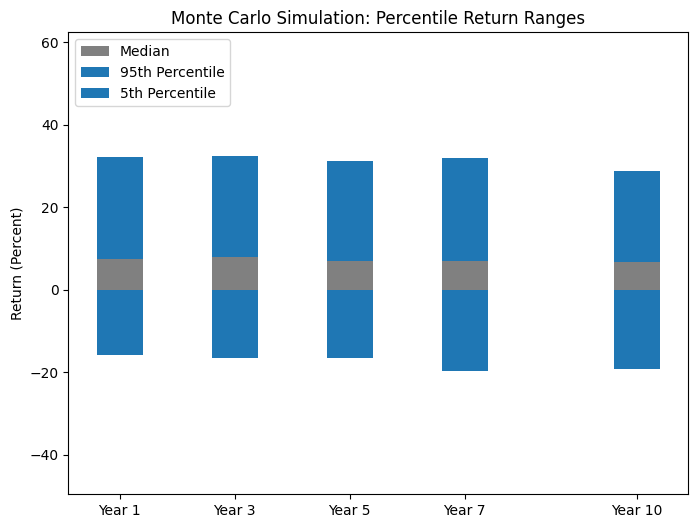

In [ ]:
# Create a stacked bar chart ensuring 5th and 95th percentiles have the exact same color
fig, ax = plt.subplots(figsize=(8, 6))

# Define common color for 5th and 95th percentile ranges
percentile_color = '#1f77b4'  # Standard blue color

# Plot stacked bars with the exact same color for 5th and 95th percentiles
ax.bar(years, median - percentile_5th, bottom=percentile_5th, color='gray', label='Median')
ax.bar(years, percentile_95th - median, bottom=median, color=percentile_color, label='95th Percentile')
ax.bar(years, percentile_5th, color=percentile_color, label='5th Percentile')

# Labels and title
ax.set_xticks(years)
ax.set_xticklabels([f"Year {y}" for y in years])
ax.set_ylabel("Return (Percent)")
ax.set_title("Monte Carlo Simulation: Percentile Return Ranges")

# Increase Y-axis limits for better visibility
ax.set_ylim(min(percentile_5th) - 30, max(percentile_95th) + 30)

# Legend
ax.legend(loc="upper left")

# Show the plot
plt.show()

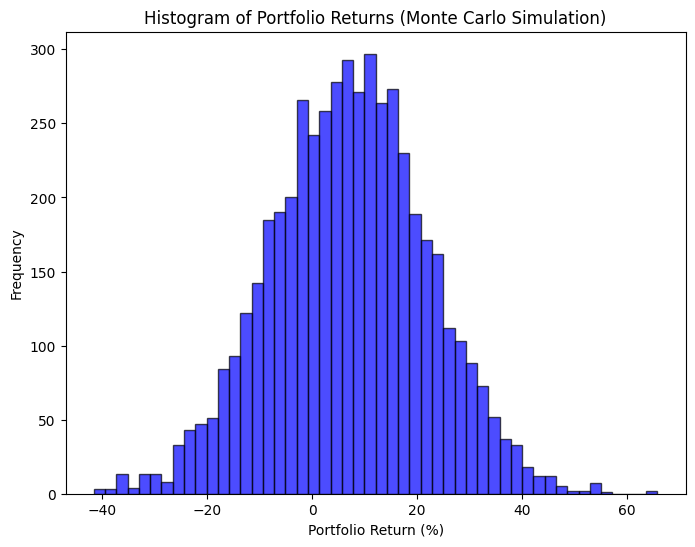

In [ ]:
# Histogram of the portfolio returns using the simulated data
fig, ax = plt.subplots(figsize=(8, 6))

# Flatten the simulated returns data for histogram plotting
all_simulated_returns = simulated_returns.flatten()

# Plot histogram
ax.hist(all_simulated_returns, bins=50, color='blue', alpha=0.7, edgecolor='black')

# Labels and title
ax.set_xlabel("Portfolio Return (%)")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Portfolio Returns (Monte Carlo Simulation)")

# Show the plot
plt.show()

In [ ]:
initial_portfolio_value = 1000000

In [ ]:
# Monte Carlo Simulation based on historical stock statistics
simulation_runs = 1000  # Number of Monte Carlo simulations
years_projection = np.arange(0, 21)  # Years 0 to 20
time_horizon = len(years_projection) * 252  # Convert years to trading days

In [ ]:
# Simulated daily log returns for each stock
historical_stock_returns = np.random.normal(loc=0.0005, scale=0.01, size=(len(dates), num_stocks))

# Convert to DataFrame with stock symbols as columns
historical_stock_returns_df = pd.DataFrame(historical_stock_returns, index=dates, columns=stock_symbols)

# Compute portfolio log returns using equal weighting
portfolio_log_returns = historical_stock_returns_df.mean(axis=1)

# Calculate historical mean return and volatility for the portfolio
historical_mean_return = portfolio_log_returns.mean() * 252  # Annualized mean return
historical_volatility = portfolio_log_returns.std() * np.sqrt(252)  # Annualized volatility

In [ ]:
# Simulate portfolio returns using historical mean return and volatility
simulated_portfolio_returns = np.exp(
    np.cumsum(np.random.normal(historical_mean_return / 252, historical_volatility / np.sqrt(252),
                               (simulation_runs, time_horizon)), axis=1)
)

# Scale initial portfolio value
simulated_portfolio_values = simulated_portfolio_returns * initial_portfolio_value

In [ ]:
# Extract values at each year marker
portfolio_projections = {p: [] for p in [10, 25, 50, 75, 90]}
for year in years_projection:
    day_index = year * 252 if year * 252 < time_horizon else -1  # Avoid out-of-bounds indexing
    for p in portfolio_projections.keys():
        portfolio_projections[p].append(np.percentile(simulated_portfolio_values[:, day_index], p))

In [ ]:
# Create a DataFrame to display portfolio values in dollars for different percentiles
portfolio_value_df = pd.DataFrame(portfolio_projections, index=years_projection)

# Rename columns for better readability
portfolio_value_df.columns = [f"{p}th Percentile ($)" for p in portfolio_projections.keys()]

# Rename index to "Years"
portfolio_value_df.index.name = "Years"

# Round values to the nearest dollar
portfolio_value_df = portfolio_value_df.round(0).astype(int)

# Print results
print(portfolio_value_df)

       10th Percentile ($)  25th Percentile ($)  50th Percentile ($)  \
Years                                                                  
0                   997129               998798              1000504   
1                  1077583              1106063              1139777   
2                  1201215              1243192              1297475   
3                  1344917              1402620              1472330   
4                  1504340              1581832              1672326   
5                  1693117              1779906              1899186   
6                  1897533              2005759              2162823   
7                  2122562              2269875              2457807   
8                  2389704              2572183              2796569   
9                  2690106              2899719              3161091   
10                 3000480              3276861              3572266   
11                 3392842              3703900              407

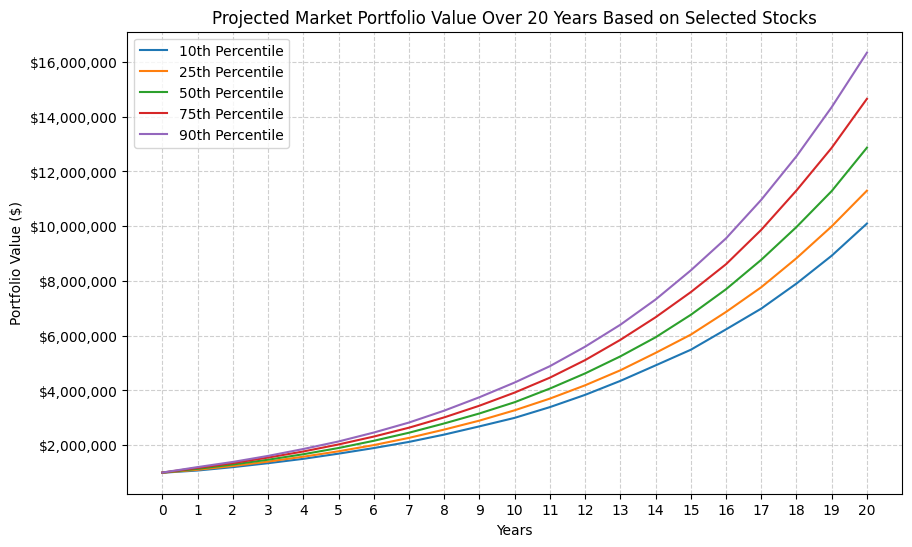

In [ ]:
import matplotlib.ticker as ticker

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each percentile projection
for p in portfolio_projections.keys():
    ax.plot(years_projection, portfolio_value_df[f"{p}th Percentile ($)"], label=f"{p}th Percentile")

# Labels and title
ax.set_xlabel("Years")
ax.set_ylabel("Portfolio Value ($)")
ax.set_title("Projected Market Portfolio Value Over 20 Years Based on Selected Stocks")
ax.set_xticks(years_projection)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# Format y-axis as currency
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Show the plot
plt.show()

In [ ]:
# Compute percentage returns relative to the initial portfolio value ($1M)
portfolio_return_df = (portfolio_value_df / initial_portfolio_value - 1) * 100

# Round to two decimal places for readability
portfolio_return_df = portfolio_return_df.round(2)

# Print results
print(portfolio_return_df)


       10th Percentile ($)  25th Percentile ($)  50th Percentile ($)  \
Years                                                                  
0                    -0.29                -0.12                 0.05   
1                     7.76                10.61                13.98   
2                    20.12                24.32                29.75   
3                    34.49                40.26                47.23   
4                    50.43                58.18                67.23   
5                    69.31                77.99                89.92   
6                    89.75               100.58               116.28   
7                   112.26               126.99               145.78   
8                   138.97               157.22               179.66   
9                   169.01               189.97               216.11   
10                  200.05               227.69               257.23   
11                  239.28               270.39               30

Momentum Strategy

In [ ]:
# Define momentum-based Monte Carlo simulation parameters
lookback_period = 252  # 1-year lookback for momentum signal
momentum_threshold = 0.02  # Momentum threshold for overweighting trending stocks

In [ ]:
# momentum scores (rolling 1-year return for each stock)
momentum_scores = historical_stock_returns_df.rolling(lookback_period).mean()

# Assign portfolio weights based on momentum (higher weight for higher momentum stocks)
momentum_weights = momentum_scores.div(momentum_scores.abs().sum(axis=1), axis=0).fillna(1/num_stocks)

# momentum-weighted portfolio returns
momentum_portfolio_returns = (historical_stock_returns_df * momentum_weights.shift(1)).sum(axis=1)

In [ ]:
# historical mean return and volatility for the momentum strategy
momentum_mean_return = momentum_portfolio_returns.mean() * 252  # Annualized return
momentum_volatility = momentum_portfolio_returns.std() * np.sqrt(252)  # Annualized volatility

# Monte Carlo Simulation based on momentum-adjusted returns
simulated_momentum_returns = np.exp(
    np.cumsum(np.random.normal(momentum_mean_return / 252, momentum_volatility / np.sqrt(252),
                               (simulation_runs, time_horizon)), axis=1)
)

In [ ]:
# Scale initial portfolio value
simulated_momentum_values = simulated_momentum_returns * initial_portfolio_value

In [ ]:
# Extract values at each year marker
momentum_portfolio_projections = {p: [] for p in [10, 25, 50, 75, 90]}
for year in years_projection:
    day_index = year * 252 if year * 252 < time_horizon else -1  # Avoid out-of-bounds indexing
    for p in momentum_portfolio_projections.keys():
        momentum_portfolio_projections[p].append(np.percentile(simulated_momentum_values[:, day_index], p))

In [ ]:
# Create a DataFrame to display momentum strategy portfolio values
momentum_portfolio_value_df = pd.DataFrame(momentum_portfolio_projections, index=years_projection)

# Rename columns for better readability
momentum_portfolio_value_df.columns = [f"{p}th Percentile ($)" for p in momentum_portfolio_projections.keys()]

# Rename index to "Years"
momentum_portfolio_value_df.index.name = "Years"

# Round values to the nearest dollar
momentum_portfolio_value_df = momentum_portfolio_value_df.round(0).astype(int)

# Display results
print(momentum_portfolio_value_df)

       10th Percentile ($)  25th Percentile ($)  50th Percentile ($)  \
Years                                                                  
0                   996088               997901              1000383   
1                  1023068              1056258              1096528   
2                  1094432              1147450              1198795   
3                  1167311              1236368              1311011   
4                  1265864              1342630              1439571   
5                  1364369              1456621              1574975   
6                  1462539              1569760              1720826   
7                  1573899              1717928              1892613   
8                  1712773              1863807              2072081   
9                  1852264              2031317              2241039   
10                 2027277              2207494              2461039   
11                 2162975              2418729              271

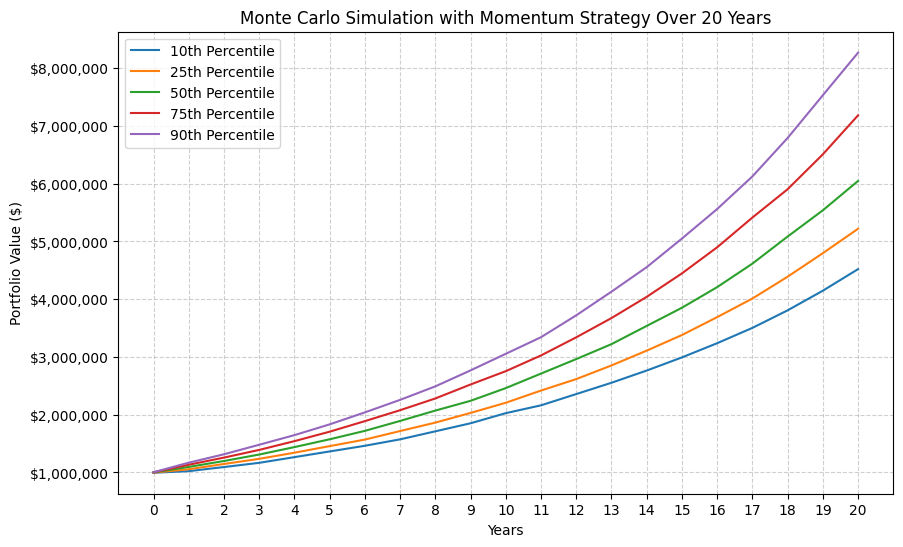

In [ ]:
# Re-plot the Monte Carlo simulation results for momentum strategy
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each percentile projection
for p in momentum_portfolio_projections.keys():
    ax.plot(years_projection, momentum_portfolio_value_df[f"{p}th Percentile ($)"], label=f"{p}th Percentile")

# Labels and title
ax.set_xlabel("Years")
ax.set_ylabel("Portfolio Value ($)")
ax.set_title("Monte Carlo Simulation with Momentum Strategy Over 20 Years")
ax.set_xticks(years_projection)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# Format y-axis as currency
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Show the plot
plt.show()